In [1]:
!mkdir -p data && cd data && curl -O "http://yaroslavvb.com/upload/notMNIST/notMNIST_small.mat"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  112M  100  112M    0     0  35.6M      0  0:00:03  0:00:03 --:--:-- 35.6M


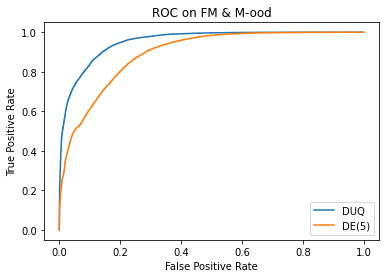

In [2]:
import random
import numpy as np
import torch
import torch.utils.data
from torch.nn import functional as F
import matplotlib.pyplot as plt

from utils.evaluate_ood import get_ROC_mnist
from utils.ensemble_eval import get_ROC_mnist_ensemble

from utils.cnn_duq import CNN_DUQ
from utils.cnn_duq import SoftmaxModel as CNN

from utils.datasets import all_datasets




if __name__ == "__main__":
    input_size = 28
    num_classes = 10
    embedding_size = 256
    learnable_length_scale = False
    gamma = 0.999
    length_scale=0.1
    model = CNN_DUQ(
          input_size,
          num_classes,
          embedding_size,
          learnable_length_scale,
          length_scale,
          gamma,
      )
    model.load_state_dict(torch.load("DUQ_FM_30_FULL.pt"))
    model = model.cuda()
    ensemble = [CNN(input_size, num_classes).cuda() for _ in range(5)]
    ensemble = torch.nn.ModuleList(ensemble)
    ensemble.load_state_dict(torch.load("FM_5_ensemble_30.pt"))


    fpr,tpr,t=get_ROC_mnist(model);
    fpre,tpre,t=get_ROC_mnist_ensemble(ensemble)
    plt.figure()
    plt.plot(fpr,tpr,label='DUQ')
    plt.plot(fpre,tpre,label='DE(5)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC on FM & M-ood')
    plt.legend(loc="lower right")
    plt.show()

            

   
